<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Machine%20Learning%3A%20Regression%2C%20KNN%2C%20sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 13: Machine Learning Review**
---

### **Description**

In this week's lab, we will review all algorithms we have seen so far. We will go through implementing and evaluating linear regression and KNN models before taking a look at building logistic regression models.

<br>

### **Structure**

**Part 1**: [[OPTIONAL] Linear Regression Review](#p1)

**Part 2**: [[OPTIONAL] KNN Review](#p2)

**Part 3**: [[OPTIONAL] Implementing Logistic Regression](#p3)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Understand how to implement and evaluate Linear Regression models in sklearn.
* Understand how to implement and evaluate KNN models in sklearn.
* Recognize how to implement and evaluate Logistic Regression models in sklearn.

<br>

### **Resources**

* [Linear Regression with sklearn](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=drive_link)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/16r4lrQNH-IUFbzh5RXL9w__ZQ6sOXWxHYaCd77nMK3Q/edit?usp=sharing)

* [Logistic Regression with sklearn](https://docs.google.com/document/d/1a2MbrwRDCP3cpnLs2n2qG-4qbR9TEP6xnfdI7cl_vzQ/edit?usp=sharing)



<br>

**Run the code below before continuing.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.datasets import load_breast_cancer

<a name="p1"></a>

---
## **Part 1: Linear Regression Review**
---

In this part, we will model the relationship between specific features (`danceability`, `instrumentalness`, and `loudness`) and the `popularity` variable as the label using linear regression.

#### **Step #1: Load the data**



In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/music_genres/music_genres_cleaned.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,34428,Type O Negative,Love You to Death,48,0.35900,0.423,428800,0.738,0.084000,F#,0.0801,-7.329,Major,0.0319,111.414,0.276,Alternative
1,1,76036,Atmosphere,Puppets,46,0.29900,0.733,221787,0.444,0.000003,E,0.1040,-7.170,Major,0.1150,89.106,0.372,Alternative
2,2,37341,Hawk Nelson,Never Let You Down,43,0.29700,0.666,262560,0.740,0.000000,G,0.1450,-5.908,Minor,0.0375,124.911,0.620,Alternative
3,3,85209,Nothing But Thieves,Honey Whiskey,49,0.02360,0.561,191947,0.764,0.000014,C#,0.2090,-5.175,Major,0.0422,90.0039999999999,0.657,Alternative
4,4,26964,The Score,Where You Are,43,0.00972,0.652,226333,0.813,0.000041,F#,0.2900,-4.737,Major,0.0410,124,0.560,Alternative


#### **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only `danceability`, `instrumentalness`, and `loudness` for the features and `popularity` for the label.


In [ ]:
features = df[['danceability', 'instrumentalness', 'loudness']]
label = df['popularity']

#### **Step #3: Split data into training and testing data**

Split the data using a 80 / 20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42)

#### **Step #4: Import your model**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

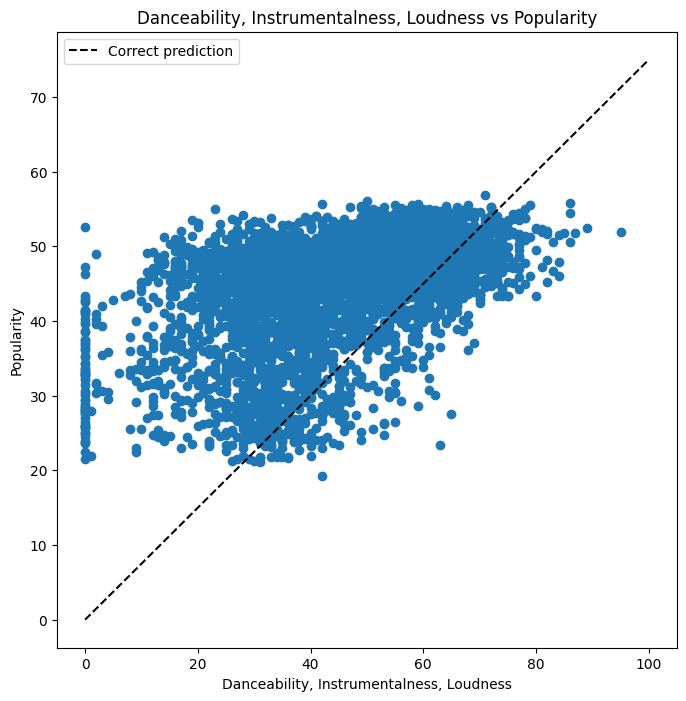

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([0, 100], [0, 75], '--k', label="Correct prediction")

plt.xlabel('Danceability, Instrumentalness, Loudness')
plt.ylabel('Popularity')
plt.title('Danceability, Instrumentalness, Loudness vs Popularity')


plt.legend()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [ ]:
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

mean squared:  184.66529178565503
R2 score:  0.21801855084305155


#### **Step #8: Use the model**

Using the model we created, predict the popularity of two new songs.

* Song 1: danceability of 0.48, instrumentalness of 0.0021, and loudness of 14.

* Song 2: danceability of 0.79, instrumentalness of 0.00036, and loudness of -7.2.

**NOTE**: you must create a dataframe containing with the information of the new songs:

```python
new_song_data = pd.DataFrame(new_song_data, columns =["danceability", "instrumentalness", "loudness"])
```

In [ ]:
new_songs = pd.DataFrame({
    "danceability": [0.48, 0.79],
    "instrumentalness": [0.0021, 0.00036],
    "loudness": [14, -7.2]
})

predicted_popularity = model.predict(new_songs)
for i, popularity in enumerate(predicted_popularity):
    print(f"Predicted price for House {i+1}: ${popularity:.2f} thousand")

Predicted price for House 1: $49.96 thousand
Predicted price for House 2: $51.76 thousand


<a name="p2"></a>

---
## **Part 2: KNN Review**
---

In this section, you will create a 5NN model to predict `music_genre` for the same dataset we used in Part 1. We will use the same features used in Part 1.

#### **Step #1: Load in Data**

**This step was completed in Part 1.**

#### **Step #2: Choose your Variables**



In [ ]:
features = df[['danceability', 'instrumentalness', 'loudness']]
label = df['music_genre']

#### **Step #3: Split your Data**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import an ML Algorithm**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the Model**

Use K = 5 here.

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)

#### **Step #6: Fit and Test**


In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(X_test)

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


In [ ]:
print(accuracy_score(y_test, predictions))

0.2779


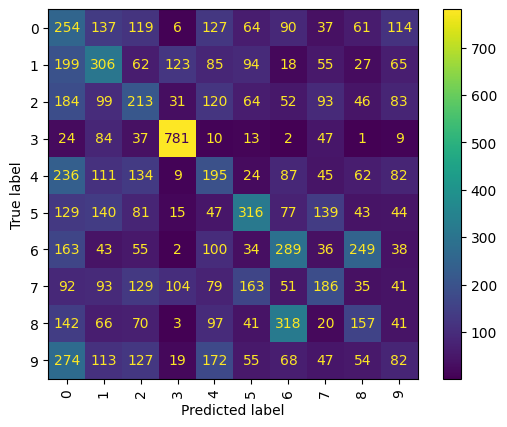

In [ ]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

plt.xticks(rotation=90)
plt.show()

Now, let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = 10)
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

10-Folds CV Scores: 0.27308183920980245 +/- 0.005505166600698711


#### **Step #8: Use the model**

Using the model we created, predict the music genre of two new songs.

* Song 1: danceability of 0.48, instrumentalness of 0.0021, and loudness of 14.

* Song 2: danceability of 0.79, instrumentalness of 0.00036, and loudness of -7.2.

**NOTE**: you must create a dataframe containing with the information of the new songs:

```python
new_song_data = pd.DataFrame(new_song_data, columns =["danceability", "instrumentalness", "loudness"])
```

In [ ]:
new_songs = pd.DataFrame({
    "danceability": [0.48, 0.79],
    "instrumentalness": [0.0021, 0.00036],
    "loudness": [14, -7.2]
})

predicted_genre = model.predict(new_songs)
for i, music_genre in enumerate(predicted_genre):
    print(music_genre)

Blues
Rap


<a name="p3"></a>

---
## **Part 3: Logistic Regression**
---
#### **About the Dataset**
We've already used the Breast Cancer dataset to create a KNN model for classification; now it's time to create a logistic regression model using it. This dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a logistic regression model in order to classify breast cancer tumors as malignant (0) or benign (1).

### **Step #1: Load the data**

Use the following code to load the breast cancer dataset.

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Step #2: Decide independent and dependent variables**

We will be using all features except `target` as our independent variables for predicting `target`.

In [ ]:
X = data.data
print(len(X[0]))
y = data.target

features = df.loc[:, df.columns != 'target']
label = df['target']

30


### **Step #3: Split the data into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the Logistic Regression algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression

### **Step #5: Initialize the model**


In [ ]:
model = LogisticRegression()

### **Step #6: Fit your model and make predictions for the test data**


In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

### **Step #7: Evaluate the model**

Print the classification report. Then, run the code cell below to plot the ROC curve.


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



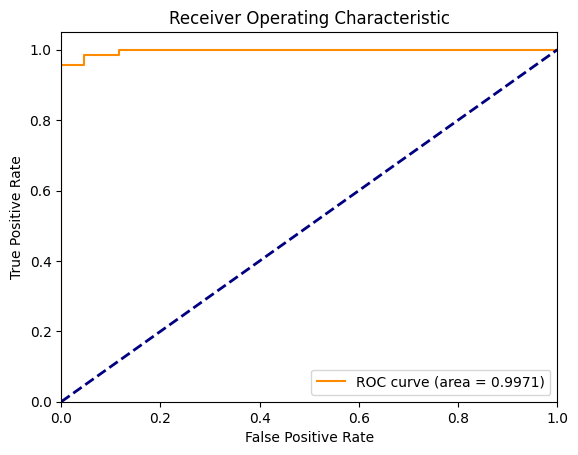

In [ ]:
# Plot Sensitivity (TPR) vs 1-Specificity (FPR)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Reflection question**
Answer the following question:

1. What do the predicted probabilities represent in this context?
2. How is the threshold of 0.5 used to convert predicted probabilities into binary predictions?
3. What does precision mean for the Benign class in this model?
4. Would you trust this model?

---
#End of Notebook

© 2023 The Coding School, All rights reserved